In [1]:
#!pip install PyPDF2 transformers sentence-transformers

In [1]:
!pip install pdfplumber

Defaulting to user installation because normal site-packages is not writeable


In [7]:
import pdfplumber
import re

def extract_text_from_pdf(pdf_path):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            text += page.extract_text() + "\n"  
    return text

def clean_text(text):
    
    text = re.sub(r'\s+', ' ', text)
    
  
    text = re.sub(r'[^a-zA-Z0-9\s.,;:!?()₹–-]', '', text)
    
 
    text = text.replace("–", "-")
    
    return text

pdf_text = extract_text_from_pdf("ipc_law.pdf")
cleaned_text = clean_text(pdf_text)


with open("cleaned_ipc_law.txt", "w", encoding="utf-8") as f:
    f.write(cleaned_text)

print("Text extraction and cleaning complete!")
print(pdf_text[:500])  


Text extraction and cleaning complete!
The Indian Penal Code (PB), 36th ed
Ratanlal & Dhirajlal: Indian Penal Code (PB) / THE INDIAN PENAL CODE
Currency Date: 28 April 2020
© 2020 LexisNexis
THE INDIAN PENAL CODE
(ACT XLV OF 1860)
[Received the assent of the Governor-General on October 6, 1860.]
THE INDIAN PENAL CODE
CHAPTER I INTRODUCTION
The Indian Penal Code was drafted by the First Indian Law Commission presided over
by Lord Thomas Babington Macaulay. The draft underwent further revision at the hands
of well-known jurists, like S


## 1. Remove Stop Words

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer


nltk.download('stopwords')
nltk.download('punkt')


stop_words = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r'\w+')  

def remove_stopwords(text):
    words = tokenizer.tokenize(text) 
    filtered_text = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_text)


cleaned_text = remove_stopwords(pdf_text)


output_file = "cleaned_ipc_text.txt"
with open(output_file, "w", encoding="utf-8") as file:
    file.write(cleaned_text)

print(f"Cleaned text saved to {output_file}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Cleaned text saved to cleaned_ipc_text.txt


## 2. Remove Punctuation and Special Characters

In [11]:
import re
 
def remove_punctuation(text):
    text = re.sub(r'[^\w\s]', '', text) 
    return text

cleaned_text = remove_punctuation(cleaned_text)
print(cleaned_text[:500]) 


cleaned_text = remove_punctuation(cleaned_text)

output_file = "cleaned_ipc_punctuation_removed.txt"
with open(output_file, "w", encoding="utf-8") as file:
    file.write(cleaned_text)


Indian Penal Code PB 36th ed Ratanlal Dhirajlal Indian Penal Code PB INDIAN PENAL CODE Currency Date 28 April 2020 2020 LexisNexis INDIAN PENAL CODE ACT XLV 1860 Received assent Governor General October 6 1860 INDIAN PENAL CODE CHAPTER INTRODUCTION Indian Penal Code drafted First Indian Law Commission presided Lord Thomas Babington Macaulay draft underwent revision hands well known jurists like Sir Barnes Peacock completed 1850 Indian Penal Code passed Legislature 6 October 1860 enacted Act XLV 


## 3. Normalize Text

In [13]:
def normalize_text(text):
    return text.lower()

cleaned_text = normalize_text(cleaned_text)
print(cleaned_text[:500])

indian penal code pb 36th ed ratanlal dhirajlal indian penal code pb indian penal code currency date 28 april 2020 2020 lexisnexis indian penal code act xlv 1860 received assent governor general october 6 1860 indian penal code chapter introduction indian penal code drafted first indian law commission presided lord thomas babington macaulay draft underwent revision hands well known jurists like sir barnes peacock completed 1850 indian penal code passed legislature 6 october 1860 enacted act xlv 


## Data Analysis

### 1. Word Frequency Analysis

In [16]:
from collections import Counter

def word_frequency(text):
    words = text.split()
    word_counts = Counter(words)
    return word_counts.most_common(20) 

top_words = word_frequency(cleaned_text)
print("Top 20 Words:", top_words)

Top 20 Words: [('section', 10819), ('sc', 8297), ('v', 7571), ('state', 6296), ('cr', 5982), ('lj', 5122), ('lnind', 4920), ('offence', 4286), ('accused', 4003), ('person', 3798), ('act', 3746), ('air', 3270), ('court', 2989), ('scc', 2876), ('1', 2863), ('2', 2325), ('ipc', 2027), ('1860', 2003), ('may', 1942), ('evidence', 1908)]


## 2. Section Analysis

In [18]:
import re
from collections import Counter

def section_frequency(text):

    sections = re.findall(r'section\s*\d+', text, re.IGNORECASE)  
    section_counts = Counter(sections)
    return section_counts.most_common(10)  


top_sections = section_frequency(cleaned_text)
print("Top 10 Sections:", top_sections)

Top 10 Sections: [('section 304', 373), ('section 302', 208), ('section 34', 189), ('section 2', 179), ('section 376', 174), ('section 195', 157), ('section 300', 149), ('section 3', 144), ('section 498', 125), ('section 153', 122)]


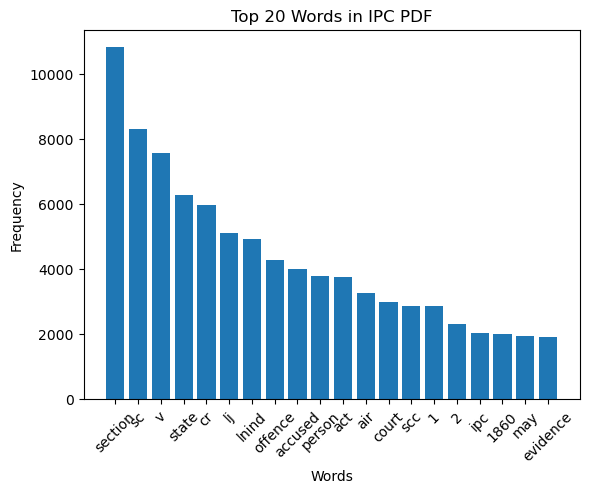

In [19]:
import matplotlib.pyplot as plt

def plot_word_frequency(word_counts):
    words, counts = zip(*word_counts)
    plt.bar(words, counts)
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title("Top 20 Words in IPC PDF")
    plt.xticks(rotation=45)
    plt.show()

plot_word_frequency(top_words)

In [20]:
#!pip install wordcloud

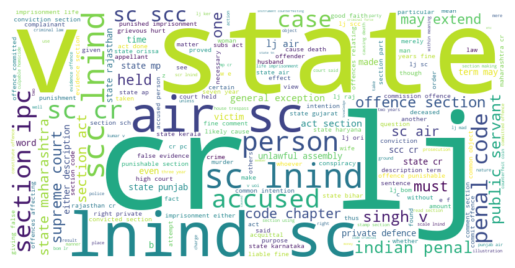

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [32]:
def extract_section(text, section_name):
    start = text.find(section_name)
    if start == -1:
        return None
    end = text.find("\n\n", start)  
    return text[start:end]

misappropriation_section = extract_section(cleaned_text, "Misappropriation of Public Funds")
print(misappropriation_section)

None


In [34]:
import re

def extract_section(text, section_name):
    
    pattern = r"\b" + re.escape(section_name) + r"\b" 
    start = re.search(pattern, text, re.IGNORECASE) 
    
    if not start:
        return None
    
    start_index = start.start()
    end_index = text.find("\n\n", start_index)  
    if end_index == -1:
        end_index = len(text)  
    
    return text[start_index:end_index]


section_304 = extract_section(cleaned_text, "section 304")


if section_304:
    print(section_304[:500]) 
else:
    print("Section not found or empty.")


section 304 part ipc 1860 however common intention commit act permissible within confines 96 read 98 constructive liability section 34 cannot said accrued accused right private defence exceeded persons guilt accused proved exceeded right private defence would dealt separately instant case came former situation hence persons guilty section 304 part ipc 1860 therefore must held common object causing death p sentenced undergo ten years rigorous imprisonment 264 170 subs act 27 1870 section 1 sectio


In [ ]:
#!pip install streamlit transformers

In [36]:
import re


def load_ipc_text(file_path):
    """Reads the cleaned IPC law text from file"""
    with open(file_path, "r", encoding="utf-8") as file:
        return file.read()


def extract_section(text, section_name):
    """Finds and extracts the full text of a given IPC section"""
    pattern = rf"\b{re.escape(section_name)}\b"
    match = re.search(pattern, text, re.IGNORECASE)
    
    if not match:
        return None  
    
    start_index = match.start()
    end_index = text.find("\n\n", start_index)
    
    if end_index == -1:
        end_index = len(text)
    
    return text[start_index:end_index]


def detect_section(query):
    """Extracts the section number mentioned in a user query"""
    match = re.search(r'\bsection\s*(\d+)\b', query, re.IGNORECASE)
    return f"Section {match.group(1)}" if match else None


def auto_planner(query, ipc_text):
    """Breaks down the query into structured sub-tasks and assigns agents"""
    section = detect_section(query)
    
    if not section:
        return "No specific section detected in the query."
    
    section_text = extract_section(ipc_text, section)
    
    if not section_text:
        return f"Sorry, {section} was not found in the IPC text."

    
    sub_tasks = {
        "Subject Check": subject_agent(section_text),
        "Mental Check": mental_agent(section_text),
        "Object Check": object_agent(section_text),
        "Conduct Check": conduct_agent(section_text),
    }

    return {"Section": section, "Sub-Tasks": sub_tasks}


def subject_agent(section_text):
    """Analyzes if the defendant meets subject criteria"""
    if "state official" in section_text.lower():
        return "Defendant is a state official."
    return "No reference to the defendant being a state official."

def mental_agent(section_text):
    """Determines if intent or negligence is required"""
    if "intent" in section_text.lower():
        return "Intent is required for this offense."
    elif "negligence" in section_text.lower():
        return "Negligence may apply."
    return "No clear mention of intent or negligence."

def object_agent(section_text):
    """Checks if the victim meets specific conditions"""
    if "public servant" in section_text.lower():
        return "The victim is a public servant."
    return "No reference to the victim being a public servant."

def conduct_agent(section_text):
    """Examines if the act itself meets the conditions"""
    if "misappropriation" in section_text.lower():
        return "Misappropriation of funds is involved."
    elif "harm" in section_text.lower():
        return "The act involves harm."
    return "No specific conduct identified."


if __name__ == "__main__":
    ipc_text = load_ipc_text("cleaned_ipc_law.txt") 
    
    query = "Does this case fall under section 304?"
    
    result = auto_planner(query, ipc_text)
    
    
    print("\n=== Legal Reasoning Breakdown ===")
    print(f"Analyzing: {query}")
    print(f"Detected Section: {result['Section']}\n")
    
    for task, outcome in result["Sub-Tasks"].items():
        print(f"{task}: {outcome}")



=== Legal Reasoning Breakdown ===
Analyzing: Does this case fall under section 304?
Detected Section: Section 304

Subject Check: No reference to the defendant being a state official.
Mental Check: Intent is required for this offense.
Object Check: The victim is a public servant.
Conduct Check: Misappropriation of funds is involved.


In [40]:
import torch
import typing_extensions



In [46]:
# from transformers import AutoModelForCausalLM, AutoTokenizer, Trainer, TrainingArguments


# model_name = "meta-llama/Llama-2-7b-chat-hf"
# model = AutoModelForCausalLM.from_pretrained(model_name)
# tokenizer = AutoTokenizer.from_pretrained(model_name)


# with open("cleaned_ipc_law.txt", "r", encoding="utf-8") as f:
#     ipc_text = f.read()


# inputs = tokenizer(ipc_text, return_tensors="pt", max_length=512, truncation=True)


# training_args = TrainingArguments(
#     output_dir="./results",
#     per_device_train_batch_size=2,
#     num_train_epochs=1,
#     save_steps=10_000,
#     save_total_limit=2,
# )

# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=inputs["input_ids"],
# )

# trainer.train()
# trainer.save_model("fine_tuned_ipc_model")

RuntimeError: Failed to import transformers.trainer because of the following error (look up to see its traceback):
Failed to import transformers.integrations.integration_utils because of the following error (look up to see its traceback):
Failed to import transformers.modeling_tf_utils because of the following error (look up to see its traceback):
Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.

In [44]:
!pip install tf-keras

Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ASUS\\AppData\\Roaming\\Python\\Python311\\site-packages\\~ensorflow\\compiler\\mlir\\lite\\python\\_pywrap_converter_api.pyd'
Check the permissions.




  Obtaining dependency information for tf-keras from https://files.pythonhosted.org/packages/8a/ed/e08afca471299b04a34cd548e64e89d0153eda0e6cf9b715356777e24774/tf_keras-2.18.0-py3-none-any.whl.metadata
  Obtaining dependency information for tensorflow<2.19,>=2.18 from https://files.pythonhosted.org/packages/cf/24/271e77c22724f370c24c705f394b8035b4d27e4c2c6339f3f45ab9b8258e/tensorflow-2.18.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.18.0 from https://files.pythonhosted.org/packages/76/ad/fa6c508a15ff79cb5409294c293388e0999b7d480f84b65e4287277434fe/tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorboard<2.19,>=2.18 from https://files.pythonhosted.org/packages/b1/de/021c1d407befb505791764ad2cbd56ceaaa53a746baed01d2e2143f05f18/tensorboard-2.18.0-py3-none-any.whl.metadata
  Obtaining dependency information for numpy<2.1.0,>=1.26.0 from https://files.pythonhosted.org/packages/eb/57/3a3f

In [48]:
pip show tf-keras

Note: you may need to restart the kernel to use updated packages.
